In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import integrate
from scipy.interpolate import UnivariateSpline
%matplotlib inline

from astropy import constants as const
from astropy import units as u

figsize = 4.5
dpi = 300

default_size = 18

plt.rcParams.update({
    'font.size': default_size,  # This sets the default font size for everything
    'axes.titlesize': default_size,
    'axes.labelsize': default_size,
    'xtick.labelsize': default_size,
    'ytick.labelsize': default_size,
    'legend.fontsize': default_size,
    'figure.titlesize': default_size
})


plt.style.use('style_prof2.mplstyle')

In [2]:
SSM_r = np.array(pd.read_csv('Smoothing/X_7Be.csv',names=['r','q'],skiprows=1,index_col=False)['r'])
SSM_T = np.array(pd.read_csv('Smoothing/T.csv',names=['r','q'],skiprows=1,index_col=False)['q'])
SSM_rho = np.array(pd.read_csv('Smoothing/rho.csv',names=['r','q'],skiprows=1,index_col=False)['q'])
SSM_P = np.array(pd.read_csv('Smoothing/P.csv',names=['r','q'],skiprows=1,index_col=False)['q'])
SSM_H = np.array(pd.read_csv('Smoothing/X_H.csv',names=['r','q'],skiprows=1,index_col=False)['q'])
SSM_He4 = np.array(pd.read_csv('Smoothing/X_He4.csv',names=['r','q'],skiprows=1,index_col=False)['q'])
SSM_He3 = np.array(pd.read_csv('Smoothing/X_He3.csv',names=['r','q'],skiprows=1,index_col=False)['q'])
SSM_C12 = np.array(pd.read_csv('Smoothing/X_C12.csv',names=['r','q'],skiprows=1,index_col=False)['q'])
SSM_N14 = np.array(pd.read_csv('Smoothing/X_N14.csv',names=['r','q'],skiprows=1,index_col=False)['q'])
SSM_O16 = np.array(pd.read_csv('Smoothing/X_N16.csv',names=['r','q'],skiprows=1,index_col=False)['q'])
SSM_Be7 = np.array(pd.read_csv('Smoothing/X_7Be.csv',names=['r','q'],skiprows=1,index_col=False)['q'])

In [3]:
def nabla_rad():
    i = 0
    gradient = []
    while i < len(SSM_r)-1:
        gradient.append(SSM_P[i]/SSM_T[i] * (SSM_T[i+1]-SSM_T[i])/(SSM_P[i+1] - SSM_P[i]))
        i = i + 1
    return gradient

In [4]:
temperature_gradient = nabla_rad()

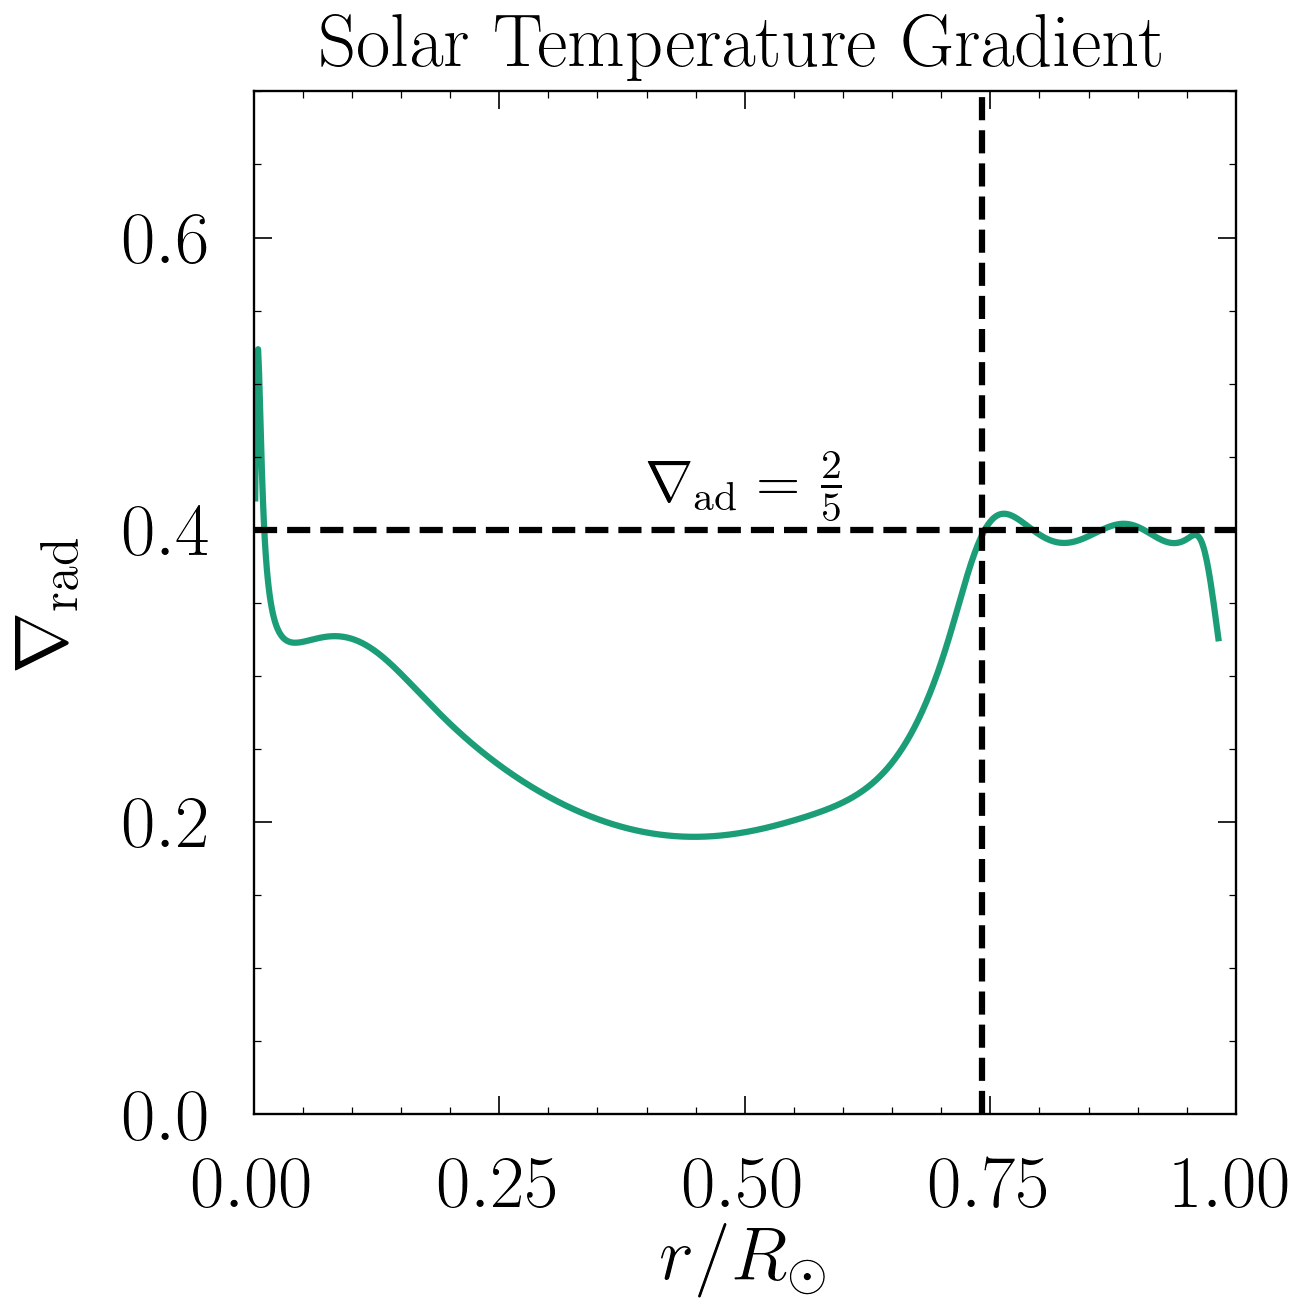

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
ax.plot(SSM_r[0:-1],temperature_gradient,lw=1.5)
ax.set_xlim(0,1)
ax.set_ylim(0,0.7)
ax.set_xlabel(r'$r/R_\odot$',labelpad=0)
ax.set_ylabel(r'$\nabla_\mathrm{rad}$',labelpad=10)
ax.hlines(0.4,0,1,ls='dashed',color='k',lw=1.5)
ax.vlines(0.742,0,0.7,ls='dashed',color='k',lw=1.5)
ax.text(0.4,0.42,r'$\nabla_\mathrm{ad} = \frac{2}{5}$',fontsize=14)
ax.set_title(r'Solar Temperature Gradient')
ax.tick_params(axis='both', which='major', pad=10)
plt.tight_layout()
plt.savefig('Images/Profiles/nabla_rad.png')
plt.show()

In [6]:
SSM_Z = np.ones_like(SSM_r) - SSM_H - SSM_He3 - SSM_He4

In [7]:
def eps_pp():
    return 2.4e4 * SSM_rho * SSM_H**2 * (SSM_T/1e9)**(-3/2) * np.exp(-3.380 * (SSM_T/1e9)**(-1/3))

def eps_CNO():
    return 4.4e25 * SSM_rho * SSM_H**2 * SSM_Z * (SSM_T/1e9)**(-3/2) * np.exp(-15.228 * (SSM_T/1e9)**(-1/3))

In [8]:
pp_power = eps_pp()
CNO_power = eps_CNO()

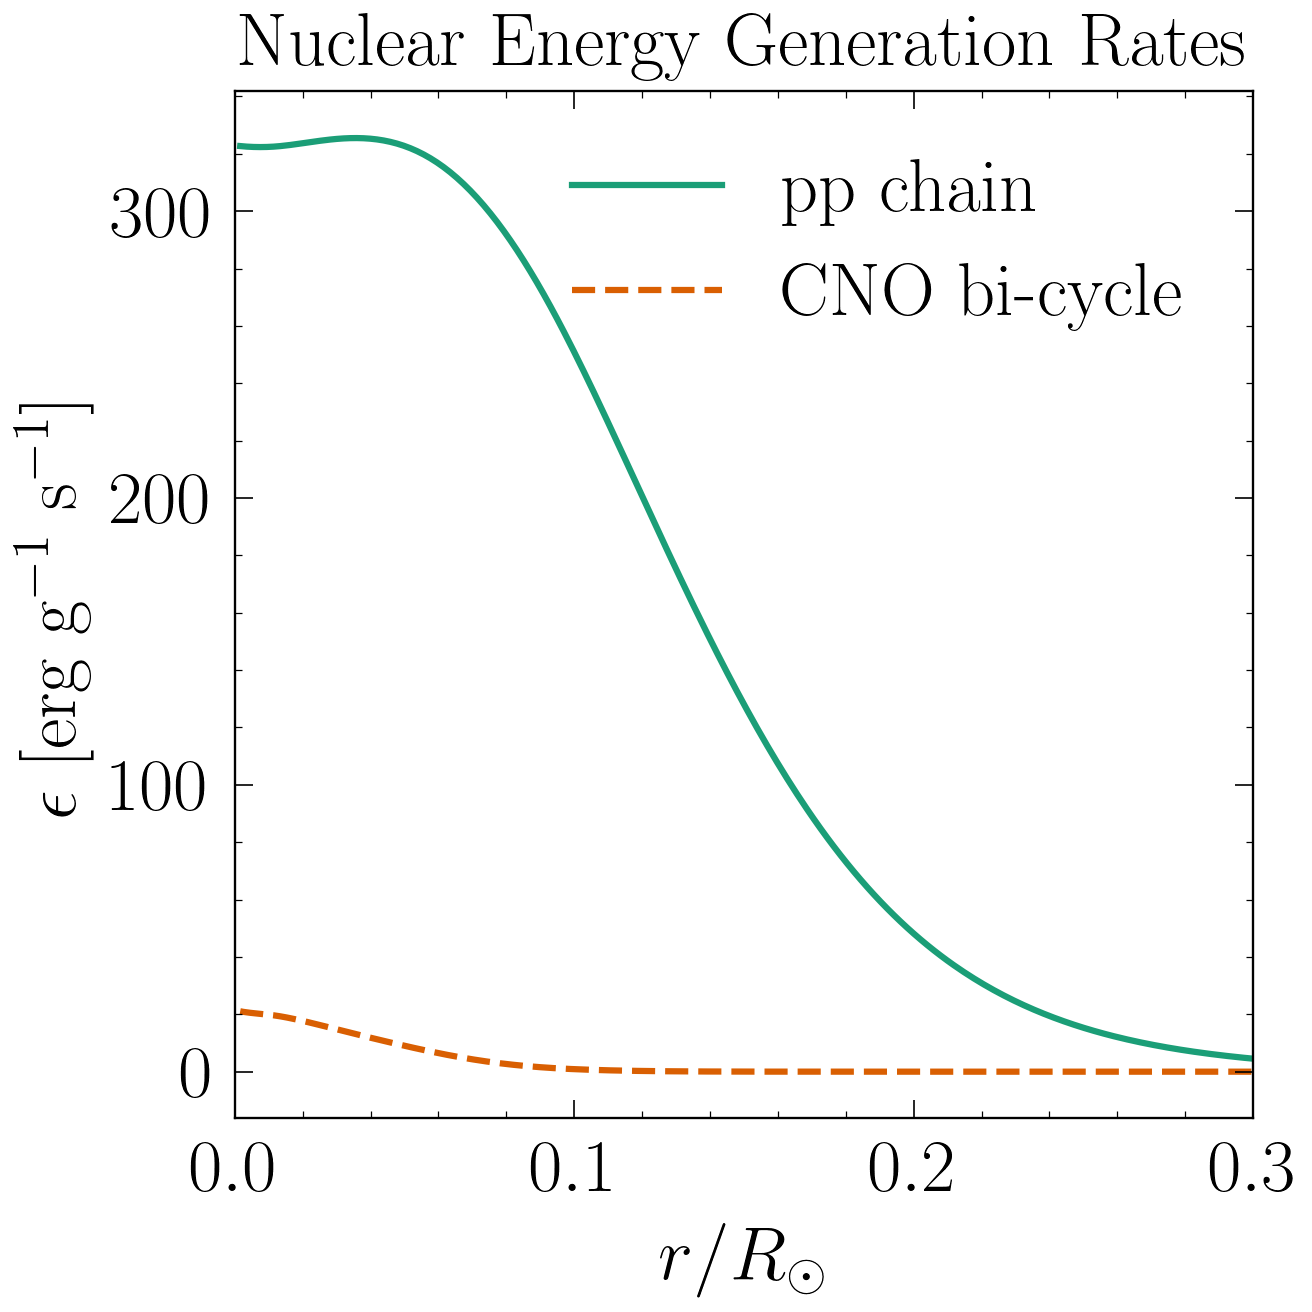

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(figsize, figsize),dpi=dpi)
ax.plot(SSM_r,pp_power,lw=1.5,label='pp chain')
ax.plot(SSM_r,CNO_power,lw=1.5,label='CNO bi-cycle',ls='dashed')
ax.set_xlim(0,0.3)
ax.set_xlabel(r'$r/R_\odot$')
ax.set_ylabel(r'$\epsilon$ [erg g$^{-1}$ s$^{-1}$]')
ax.set_title(r'Nuclear Energy Generation Rates')
ax.tick_params(axis='both', which='major', pad=5)
plt.tight_layout()
ax.legend()
plt.savefig('Images/Profiles/energy_gen.png')
plt.show()